## How to draw functions in Python

When you start developing a Machine Learning model, it is usally convenient either to work with toy datasets (small datasets on which you can perform the desired task, but not complicated) or to generate a synthetic dataset to test your model on.

So, even if it's not a "required skill" to become a Data Scientist, it's always good to know ho to play with mathematical objects, also because it gives you a better understanding of the problem.

As usual in Python, let's start by importing the `numpy` and `matplotlib` libraries: 

In [22]:
import numpy as np
import matplotlib.pyplot as plt

When you define a line in Math, you usually use a formula like the following:

$$ y = 2x+5$$

then, to draw it, you usually assign two values to $x$ and see the corresponding value of $y$:

| x | y |
|---|---|
| 0 | 5 |
| 1 | 15|

Now you can plot the two points on your carthesian plane and draw a line between them, maybe using dashes at the extreme of the line to give a sense of "infinity" somehow.

We can do it in Python too, by using `plt.plot()` function:

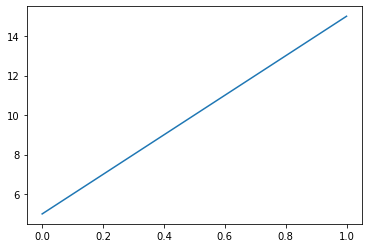

In [23]:
plt.plot([0,1], [5,15])

But what if you want to draw a more complicate curve? It's an hard task if you do it on paper. For example: let's say that you want to draw $sin(x)$. Ok, you know how it looks like. It's like a wave. You just need to remember what is the value of $sin(0)$ (*i.e.* 0) and the rest is kinda free.

How do you communicate it to a computer? It doesn't have your drawing skills (yet)!

However, the previous idea is fine: assign values to the $x$ and check the value of the $y$. Let's try with some value:

$$y = sin(x)$$

| x  | y |
|----|---|
| 0  | 0 |
| π/2| 1 |
| π  | 0 |
|3/2π| -1|
| 2π | 0 |


In [24]:
x = [0, np.pi/2, np.pi, 3/2*np.pi, 2*np.pi]
y = [0, 1, 0, -1, 0]

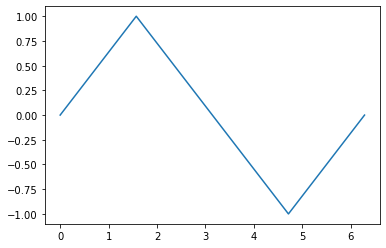

In [25]:
plt.plot(x,y)

It doesn't look like a sinusoid :(
But I like the idea. Stick with it. Add more points.

| x  | y |
|----|---|
| 0  | 0 |
| π/4| √2/2 |
| π/2| 1 |
|3/4π | √2/2 |
| π  | 0 |
|5/4π | -√2/2|
|3/2π| -1|
|7/4π | -√2/2 |
| 2π | 0 |



In [26]:
x = [0, np.pi/4, np.pi/2, 3/4*np.pi, np.pi, 5/4*np.pi, 3/2*np.pi, 7/4*np.pi, 2*np.pi]
y = [0, np.sqrt(2)/2, 1, np.sqrt(2)/2, 0, -np.sqrt(2)/2, -1, - np.sqrt(2)/2, 0]

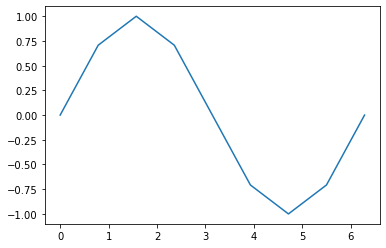

In [27]:
plt.plot(x,y)

We are getting closer! If we could find 1000 points, maybe... it would look better...

There's a way to do it! Look at this: https://numpy.org/doc/stable/reference/generated/numpy.linspace.html



In [28]:
x = np.linspace(0, 2*np.pi, 1000)
#x

So our `x` in the cell above contains 1000 points equally spaced between 0 and 2π! How do we compute the value of the $sin$ for each of them? Well:

In [29]:
y = np.sin(x)
#y

Hooray! We have 1000 points now! Let's plot them:

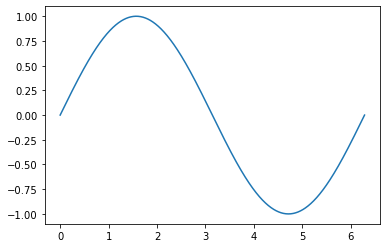

In [30]:
plt.plot(x,y)

Well done! Time to watch this: https://www.youtube.com/watch?v=rlM7gsUY9Gw

*10 hours later...*


Let's have fun extending the interval of x:

In [31]:
x = np.linspace(-10*np.pi, 10*np.pi, 1000)
y = np.sin(x)

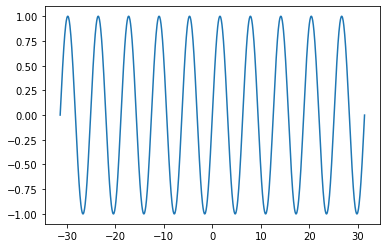

In [32]:
plt.plot(x, y)

The cool thing is that you can repeat this reasoning for many functions! Let's see this for a parabola:

$$y=x^{2}$$

In [33]:
x = np.linspace(-50, 50, 1000)
y = x**2

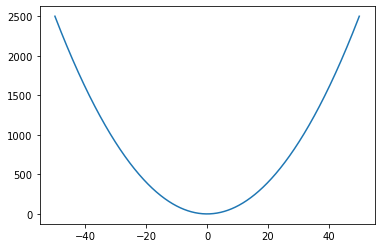

In [34]:
plt.plot(x,y)

What about this?

$$y = \cos(-x^{9}) - \log(x^{6}) + \sin(\pi x^{2}) + \cos(2\pi x)+ \frac{\sqrt{2}}{\pi}$$

In [35]:
x = np.linspace(-100, 100, 1000)
y = np.cos(-x**9) -np.log(x**6) + np.sin(np.pi*x**2) - np.sin(x) + np.cos(np.pi*2*x) + np.sqrt(2)/np.pi

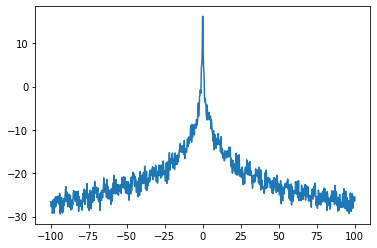

In [36]:
plt.plot(x, y)

It reminds me this: ![image](https://techweez.com/wp-content/uploads/2016/11/dog.jpg)

Draw the dog:

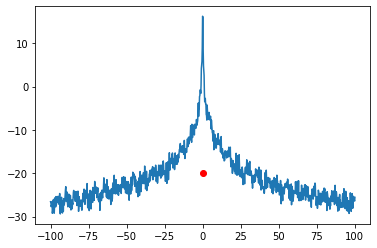

In [37]:
plt.plot(x, y)
plt.scatter([0], [-20], c ="r")

## Derivative

We can compute the derivative of functions by using `scipy`:

In [38]:
# On your terminal
# conda install scipy

In [50]:
from scipy.misc import derivative

Since the derivative is computed for a function, scipy asks us to wrap the formula we defined above into a function. Let's take the $\sin$ for example:

In [40]:
def sin(x):
    return np.sin(x)

Cool, now let's compute the derivative of it in the point $\pi$ by using:

In [51]:
derivative(sin, np.pi, dx=1e-9)

-1.000000082740371

Since we are using a computer, we need to deal with approximation. This is why you specify dx as well and this is why you don't get -1, but -1.0000000001396114. So, how can we draw it?

We know that the derivative of $sin(x)$ is $cos(x)$. As we did before, we can define the values for $x$, then we compute the derivative of the function for those values too!

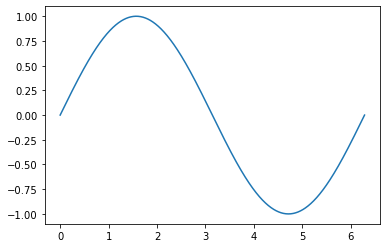

In [42]:
x = np.linspace(0, 2*np.pi, 1000)
plt.plot(x, sin(x))

In [43]:
sin_derivative = derivative(sin, x, dx=1e-6)

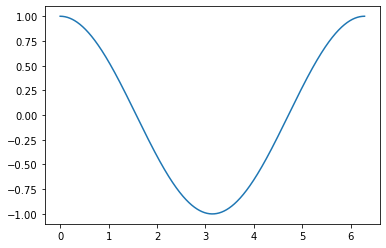

In [44]:
plt.plot(x, sin_derivative)

Is that... cosine?? 😱

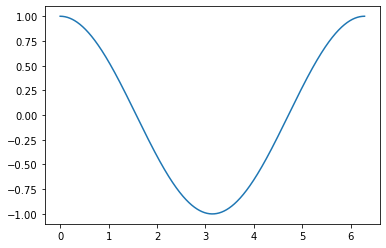

In [45]:
def cos(x):
    return np.cos(x)

plt.plot(x, cos(x))

They looks identifcal! Mission accomplished! Let's plot $sin(x)$ and its derivative in the same plot:

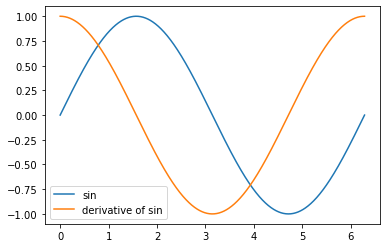

In [46]:
plt.plot(x, sin(x))
plt.plot(x, sin_derivative)
plt.legend(["sin", "derivative of sin"])

Let's try with $\log(x)$:

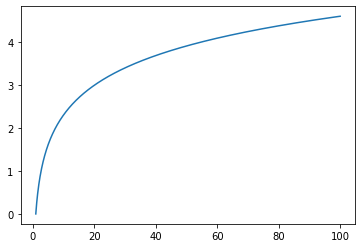

In [47]:
def log(x):
    return np.log(x)

x = np.linspace(1, 100, 1000)
plt.plot(x, log(x))

In [48]:
log_derivative = derivative(log, x, dx=1e-6)

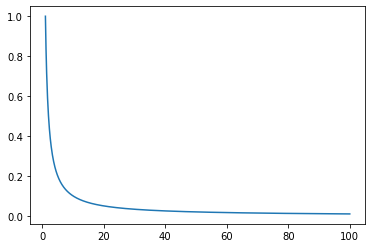

In [49]:
plt.plot(x, log_derivative)

That is actually the plot of $\frac{1}{x}$!

## Exercises

1. Plot the absolute value of x and its derivative. Choose an interval to have a nice looking shape.

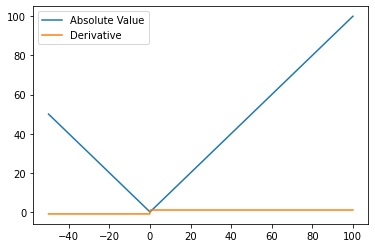

In [67]:
def absolute_value(x):
    return abs(x)

x = np.linspace(-50, 100, 1000)
y = absolute_value(x)
plt.plot(x, y, label = "Absolute Value")

absolute_derivative = derivative(absolute_value, x, dx = 1e-6)
plt.plot(x, absolute_derivative, label = "Derivative")
plt.legend()
plt.show()



2. Plot the function $x\log(x)$ and its derivative.

C:\Users\ritth\AppData\Local\Temp\ipykernel_18368\436831865.py:2: RuntimeWarning: invalid value encountered in log
  return x * np.log(x)
C:\Users\ritth\AppData\Local\Temp\ipykernel_18368\436831865.py:2: RuntimeWarning: invalid value encountered in log
  return x * np.log(x)


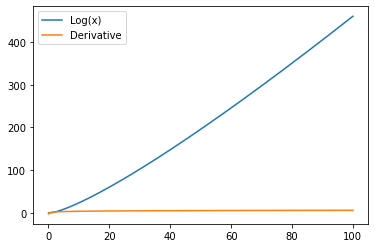

In [66]:
def xlog(x):
    return x * np.log(x)

x = np.linspace(10, 100, 1000)
y = xlog(x)
plt.plot(x, y, label = "Log(x)")

log_derivative = derivative(xlog, x, dx = 1e-9)
plt.plot(x, log_derivative, label = "Derivative")
plt.legend()
plt.show()


3. Plot the function $e^{x}\log(x)+5$ and its derivative.

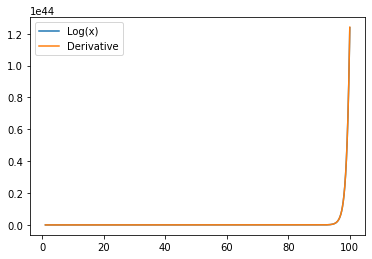

In [75]:
def elog(x):
    return np.exp(x)  * np.log(x) + 5

x = np.linspace(1, 100, 10000)
y = elog(x)
plt.plot(x, y, label = "Log(x)")

log_derivative = derivative(elog, x, dx = 1e-6)
plt.plot(x, log_derivative, label = "Derivative")
plt.legend()
plt.show()

4.(Harder) Plot the function $\sin(\frac{1}{2}x)+2$ in the interval \[0, $2\pi$\]. Plot in the same graph both the function and the tangent line to the points in which the function has derivative = 0.

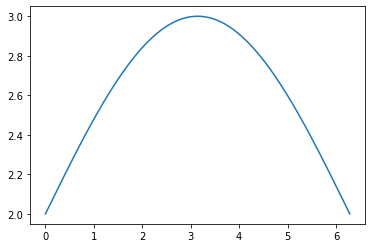

In [71]:
def sin_value(x):
    return np.sin((1/2) * x) + 2 
    
x = np.linspace(0, 2 * np.pi, 1000)
y = sin_value(x)
plt.plot(x, y, label = "Sin Value")
